<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/ML_Final_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy (Min-Max Scaling): 0.9089601072216966
Precision (Min-Max Scaling): 0.5775075987841946
Recall (Min-Max Scaling): 0.11944677284157586
F1 score (Min-Max Scaling): 0.1979510331654801 



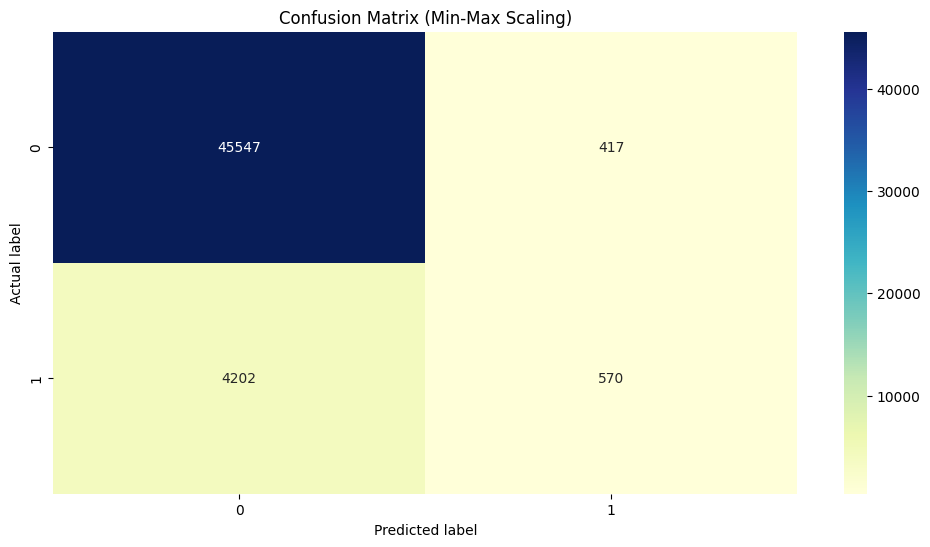

Feature Importance:
HighBP: 0.7924817308370524
HighChol: 0.716521875779259
CholCheck: 0.6314267632131554
BMI: 0.20893771976298492
Smoker: 0.430080533076405
Stroke: 1.1119137430195778
Diabetes: 0.3539866128843356
PhysActivity: 0.040953252431755426
Fruits: 0.11840343999033293
Veggies: 0.02952395810706022
HvyAlcoholConsump: 0.4574476102527715
AnyHealthcare: 0.27897912100987693
NoDocbcCost: 0.010176525978672761
GenHlth: 2.0107501869966224
MentHlth: 0.28332575602782994
PhysHlth: 0.023208107010727615
DiffWalk: 0.4949685186866828
Sex: 0.6518870076762978


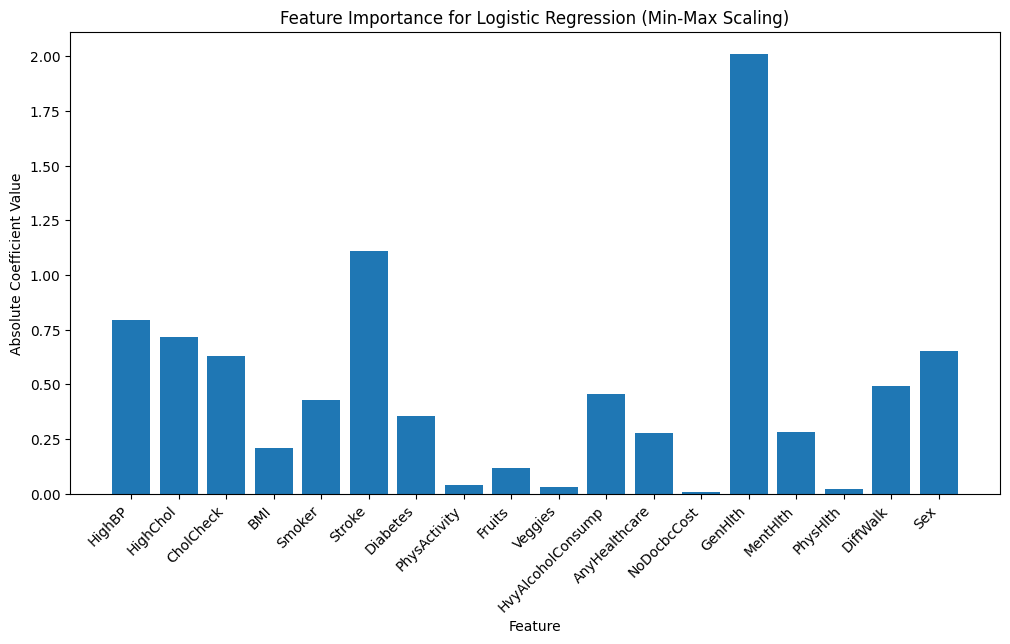

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

# Import the dataset
data = pd.read_csv("Project DataSet.csv")

column_to_modify1 = 'BMI'
data[column_to_modify1] = data[column_to_modify1].apply(lambda x: 1 if x >= 30 else 0)

column_to_modify2 = 'Diabetes'
data[column_to_modify2] = data[column_to_modify2].apply(lambda x: 1 if x >= 1 else 0)

# Separate data
y = data.values[:, 0]  # Heart Disease or Attack
x = data.values[:, 1:19]

# Separate training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
x_train_minmax = scaler_minmax.fit_transform(x_train)
x_test_minmax = scaler_minmax.transform(x_test)

# Logistic Regression with Min-Max Scaling
classifier_minmax = LogisticRegression(random_state=0)
classifier_minmax.fit(x_train_minmax, y_train)
y_pred_minmax = classifier_minmax.predict(x_test_minmax)

# Confusion matrix to check accuracy (Min-Max Scaling)
cnf_matrix_minmax = confusion_matrix(y_test, y_pred_minmax)

# Evaluation of model (Min-Max Scaling)
print("Accuracy (Min-Max Scaling):", metrics.accuracy_score(y_test, y_pred_minmax))
print("Precision (Min-Max Scaling):", metrics.precision_score(y_test, y_pred_minmax))
print("Recall (Min-Max Scaling):", metrics.recall_score(y_test, y_pred_minmax))
print("F1 score (Min-Max Scaling):", metrics.f1_score(y_test, y_pred_minmax), '\n')

# Visualization of confusion matrix (Min-Max Scaling)
plt.figure(figsize=(12, 6))
sns.heatmap(cnf_matrix_minmax, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix (Min-Max Scaling)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

# Feature importance
feature_importance = np.abs(classifier_minmax.coef_[0])

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(data.columns[1:19], feature_importance):
    print(f"{feature}: {importance}")

plt.figure(figsize=(12, 6))
plt.bar(data.columns[1:19], feature_importance)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance for Logistic Regression (Min-Max Scaling)')
plt.show()